<h1> Model to Predict which StirBank customers are more likely to respond positively to a marketing call. </h1>

In [1]:
# load data
import pandas as pd
import numpy as np
df=pd.read_csv("bank-tr.csv")

In [2]:
df.head(5)

,accountID,town,country,age,job,married,education,defaulted?,current_balance,housing,has_loan,last_contact,cc_tr,last_contact_day,last_contact_month,campaign,days_since_last_contact,previous,poutcome,made_deposit
0,24634684,Crawley,UK,39,management,married,tertiary,no,-190,no,yes,unknown,1,11,jun,8,-1,0,unknown,yes
1,80795929,Southend-on-Sea,UK,53,housemaid,married,primary,no,362,no,no,cellular,1,28,jul,2,-1,0,unknown,yes
2,30786087,Gillingham,UK,79,retired,divorced,primary,no,2787,no,no,telephone,5,13,jul,1,377,1,success,yes
3,38925327,Gateshead,UK,43,services,single,secondary,no,550,yes,no,cellular,4,13,may,2,-1,0,unknown,no
4,30560733,Eastbourne,UK,35,technician,single,secondary,no,344,no,no,cellular,2,27,aug,16,-1,0,unknown,yes


<p>From the given business understanding and problem statement I have determined it is a <b>classification problem</b> that can be solved by testing a few classification models <b>(Random Forest CLassifier, Logistic regression, Multilayer Perceptron CLassifier)</b> and evaluating which is best at predicting what class the customers will fall under
</p>

# Data Understanding : 
 To better understand the modelling steps we need to take we need to examine our data first to understand the existing distribution underneath it.

In [3]:
# data types and summary stats...
# "include=all" is needed to include all columns, otherwise we'll just get stats for numeric ones
# here, we can see that depArr has 4 values (a little suspicous); operation_mode has a mean of 1.0 std (standard deviation) of 0.0, and min/max of 1.0, so it's all 1 value.
df.describe(include="all")

,accountID,town,country,age,job,married,education,defaulted?,current_balance,housing,has_loan,last_contact,cc_tr,last_contact_day,last_contact_month,campaign,days_since_last_contact,previous,poutcome,made_deposit
count,8.000000e+03,8000,8000,8000.000000,8000,8000,8000,8000,8000.000000,8000,8000,8000,8000.000000,8000.00000,8000,8000.000000,8000.000000,8000.000000,8000,8000
unique,NaN,101,5,NaN,12,3,4,2,NaN,2,3,4,NaN,NaN,13,NaN,NaN,NaN,4,2
top,NaN,London,UK,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,NaN,may,NaN,NaN,NaN,unknown,no
freq,NaN,472,7995,NaN,1824,4557,3888,7880,NaN,4227,6964,5740,NaN,NaN,2037,NaN,NaN,NaN,5960,4172
mean,5.540746e+07,NaN,NaN,41.211750,NaN,NaN,NaN,NaN,1516.520500,NaN,NaN,NaN,3.011250,15.70875,NaN,2.497125,51.573375,0.840375,NaN,NaN
std,2.596137e+07,NaN,NaN,11.972545,NaN,NaN,NaN,NaN,3168.517624,NaN,NaN,NaN,1.419903,8.43299,NaN,2.770145,109.155207,2.371307,NaN,NaN
min,1.000040e+07,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,-3058.000000,NaN,NaN,NaN,1.000000,1.00000,NaN,1.000000,-1.000000,0.000000,NaN,NaN
25%,3.305826e+07,NaN,NaN,32.000000,NaN,NaN,NaN,NaN,120.000000,NaN,NaN,NaN,2.000000,8.00000,NaN,1.000000,-1.000000,0.000000,NaN,NaN
50%,5.558780e+07,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,545.500000,NaN,NaN,NaN,3.000000,15.00000,NaN,2.000000,-1.000000,0.000000,NaN,NaN
75%,7.769044e+07,NaN,NaN,49.000000,NaN,NaN,NaN,NaN,1694.000000,NaN,NaN,NaN,4.000000,22.00000,NaN,3.000000,33.250000,1.000000,NaN,NaN


In [4]:
# count the nulls/missing data in each column
df.isnull().sum()

#thus there exist no null values

accountID                  0
town                       0
country                    0
age                        0
job                        0
married                    0
education                  0
defaulted?                 0
current_balance            0
housing                    0
has_loan                   0
last_contact               0
cc_tr                      0
last_contact_day           0
last_contact_month         0
campaign                   0
days_since_last_contact    0
previous                   0
poutcome                   0
made_deposit               0
dtype: int64

array([[<AxesSubplot:title={'center':'accountID'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'current_balance'}>],
       [<AxesSubplot:title={'center':'cc_tr'}>,
        <AxesSubplot:title={'center':'last_contact_day'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'days_since_last_contact'}>,
        <AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>]],
      dtype=object)

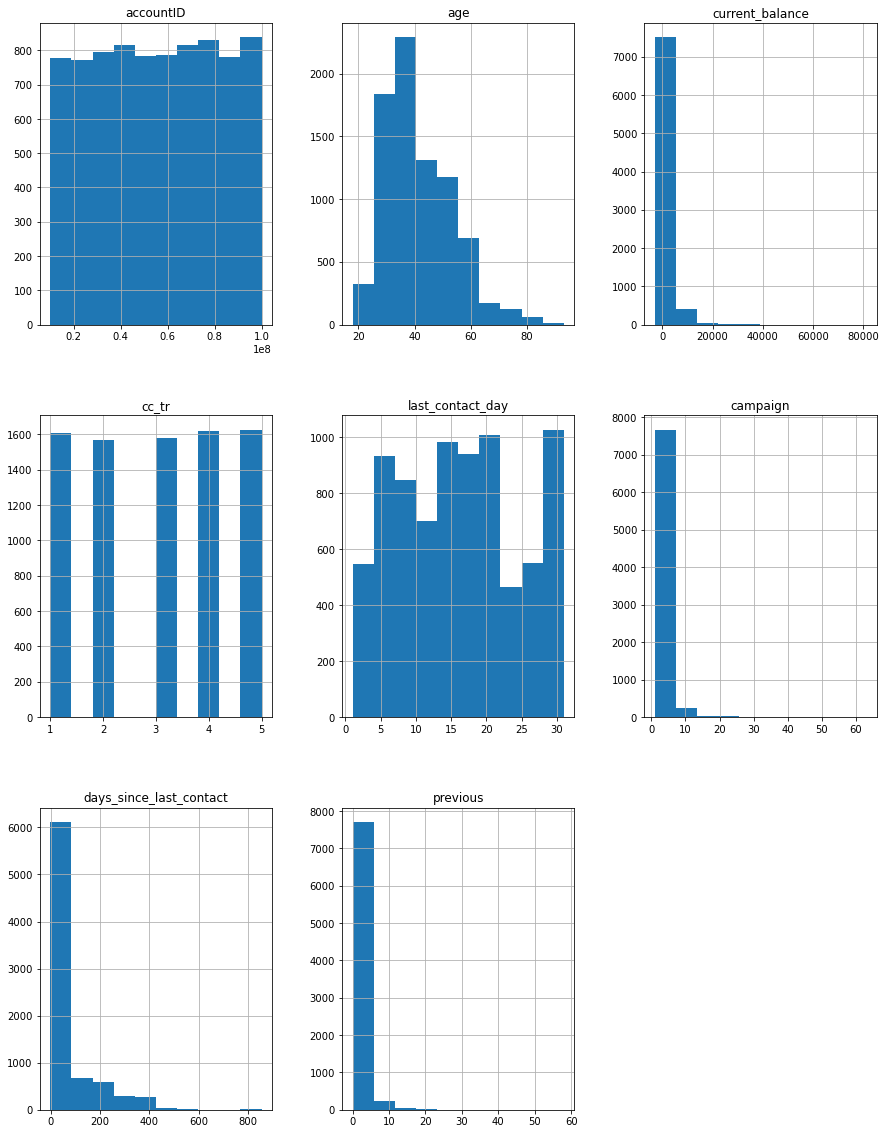

In [5]:
# Data understanding: Plot distributions...
df.hist(figsize = (15,20))

<h3> The Distribution for non-numerical variables are missing </h3>
We can fix it like so:::

town


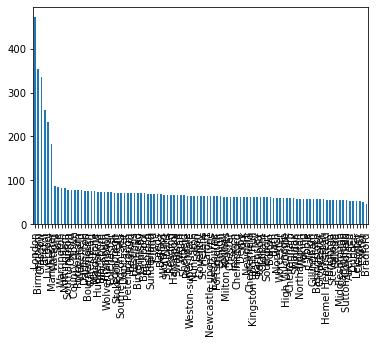

country


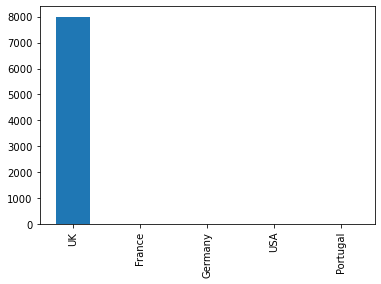

job


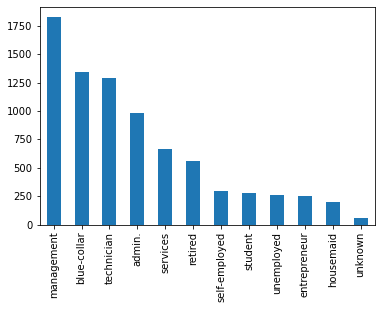

married


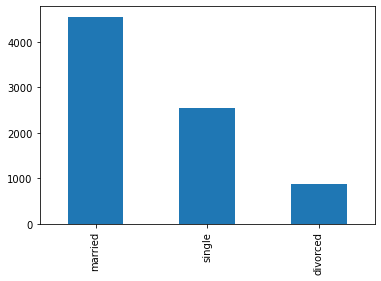

education


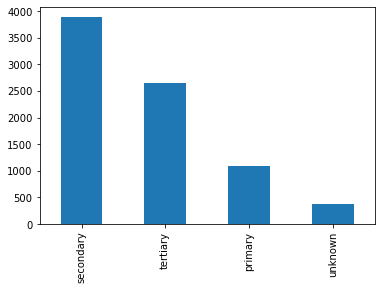

defaulted?


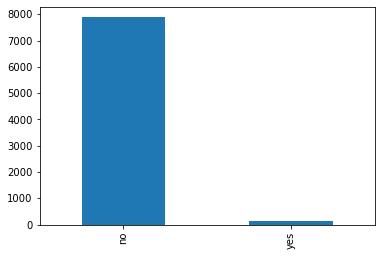

housing


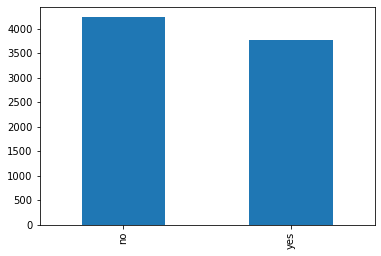

has_loan


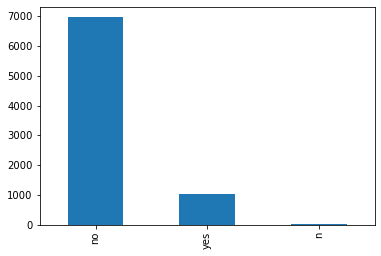

last_contact


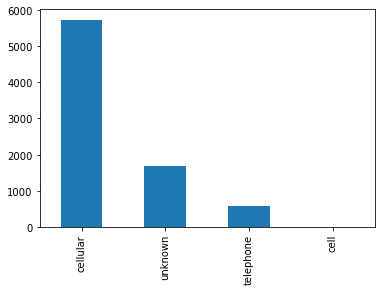

last_contact_month


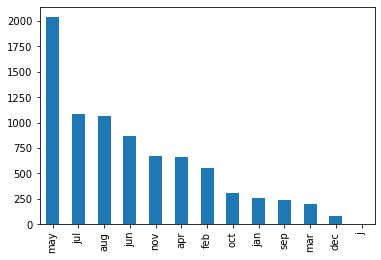

poutcome


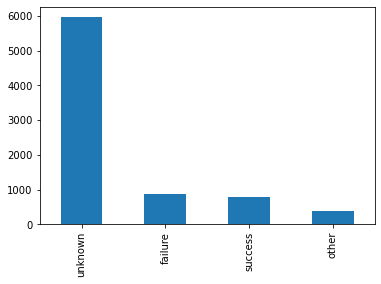

made_deposit


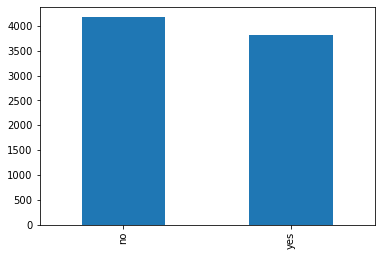

In [6]:
# plot individually with syntax:
#df['country'].value_counts().plot(kind='bar')

# Or Alternatively Plot iteratively by going throught lisst of non-numeric items using:
import matplotlib.pyplot as plt
for col in df.select_dtypes(include=object).columns: 
    print(col)
    df[col].value_counts().plot(kind='bar')
    plt.show()

# Data Preparation::
In this phase we will go through a list of steps to clean the data and discard unnecessary rows and columns

* Split our Data into Training and Test sets 
* Edit the Domain (i.e Fix/Correct wrong values or misspellings)
* Remove unnecessary Rows
* Select and Discard Useful columns
* One-Hot Encode
* Normalize the Data

In [7]:
# Split Data into Training and test sets
df_copy = df.copy()
df_train = df_copy.sample(frac=0.75, random_state=0)
df_test = df_copy.drop(df_train.index)

<AxesSubplot:>

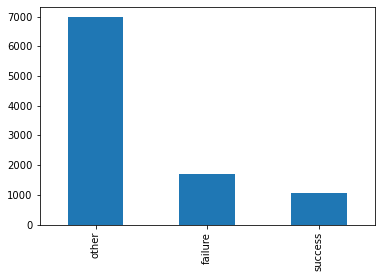

In [8]:
# Correct Misspellings pivot/merge complex categories e.t.c

# Map job variable to employed and unemployed 
df_copy['job'] = df_copy['job'].replace({'admin.':'employed','student':'unemployed'})
df_copy['job'] = df_copy['job'].replace({'management':'employed','Unemployed':'unemployed'})
df_copy['job'] = df_copy['job'].replace({'blue-collar':'employed','retired':'unemployed'})
df_copy['job'] = df_copy['job'].replace({'services':'employed','technician':'employed', 'self-employed':'employed','entrepreneur':'employed','housemaid':'employed'})

# T/N to remove 'unknown' groups later on
#df_copy['job'].value_counts().plot(kind='bar'))           #after

# Correct the education variable
df_copy['education'] = df_copy['education'].replace({'unknown':'others'})
#df_copy['education'].value_counts().plot(kind='bar')

# Correct has_loan
df_copy['has_loan'] = df_copy['has_loan'].replace({'n':'no'})
df_copy['has_loan'].value_counts().plot(kind='bar')

# Correct last contact
df_copy['last_contact'] = df_copy['last_contact'].replace({'unknown':'others', 'cell':'cellular'})
df_copy['last_contact'].value_counts().plot(kind='bar')

# Correct Last contact month
df_copy['last_contact_month'] = df_copy['last_contact_month'].replace({'j':'jan'})
df_copy['last_contact_month'].value_counts().plot(kind='bar')

# correct P-outcome
df_copy['poutcome'] = df_copy['poutcome'].replace({'unknown':'other', })
df_copy['poutcome'].value_counts().plot(kind='bar')



<AxesSubplot:>

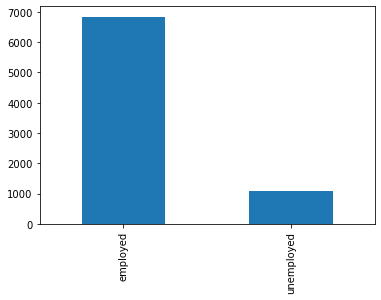

In [9]:
# Remove Un-needed Rows:

# Remove countries not UK
df_copy=df_copy.loc[df_copy['country'] == 'UK']

# remove unknown group in job column/feature/variable:
df_copy=df_copy.loc[df_copy['job'] != 'unknown']

df_copy['job'].value_counts().plot(kind='bar')


In [10]:
# Select Only Useful COlumns:
selected_features = ['age', 'job', 'married', 'education', 'current_balance', 'housing', 'has_loan', 'last_contact', 'last_contact_month', 'poutcome']

# how to use it
df_copy[selected_features]

,age,job,married,education,current_balance,housing,has_loan,last_contact,last_contact_month,poutcome
0,39,employed,married,tertiary,-190,no,yes,others,jun,other
1,53,employed,married,primary,362,no,no,cellular,jul,other
2,79,unemployed,divorced,primary,2787,no,no,telephone,jul,success
3,43,employed,single,secondary,550,yes,no,cellular,may,other
4,35,employed,single,secondary,344,no,no,cellular,aug,other
...,...,...,...,...,...,...,...,...,...,...
7995,46,employed,divorced,secondary,875,yes,yes,cellular,may,failure
7996,49,employed,married,tertiary,411,no,no,telephone,may,other
7997,42,employed,single,tertiary,-411,yes,no,cellular,jul,other
7998,31,employed,married,tertiary,1224,yes,yes,cellular,jul,other


<AxesSubplot:>

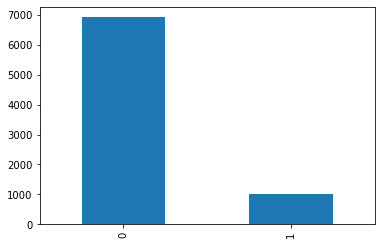

In [11]:
# Before We can normalise we need to trasform our categorical variable to numeric values via "ONE hot-encoding"

    # Features with Binary categories can be manually replaced like so first:::

df_copy['job'] = df_copy['job'].replace({'employed':1, 'unemployed':0})             # Job binary variable

df_copy['housing'] = df_copy['housing'].replace({'yes':1, 'no':0})                  # housing binary variable

df_copy['has_loan'] = df_copy['has_loan'].replace({'yes':1, 'no':0})                # has_loan binary variable


df_copy['has_loan'].value_counts().plot(kind='bar')        #check distribution



In [12]:
# One Hot encoding MultiLabel Categorical Variables:
mlab = ['married','education','last_contact','last_contact_month','poutcome']
x_multi = df_copy[mlab].values
x_multi

array([['married', 'tertiary', 'others', 'jun', 'other'],
       ['married', 'primary', 'cellular', 'jul', 'other'],
       ['divorced', 'primary', 'telephone', 'jul', 'success'],
       ...,
       ['single', 'tertiary', 'cellular', 'jul', 'other'],
       ['married', 'tertiary', 'cellular', 'jul', 'other'],
       ['single', 'secondary', 'cellular', 'oct', 'other']], dtype=object)

In [13]:
# Some Array slicing Tips
print(x_multi[:,0]) #returns all rows of data for first column

print(x_multi[0,2]) # returns 3r item on 1st row
print(x_multi[:2])  #return all items from 1st to 2 row
x_multi[:,4]
print(x_multi[:,:5])

['married' 'married' 'divorced' ... 'single' 'married' 'single']
others
[['married' 'tertiary' 'others' 'jun' 'other']
 ['married' 'primary' 'cellular' 'jul' 'other']]
[['married' 'tertiary' 'others' 'jun' 'other']
 ['married' 'primary' 'cellular' 'jul' 'other']
 ['divorced' 'primary' 'telephone' 'jul' 'success']
 ...
 ['single' 'tertiary' 'cellular' 'jul' 'other']
 ['married' 'tertiary' 'cellular' 'jul' 'other']
 ['single' 'secondary' 'cellular' 'oct' 'other']]


<h2> Now back to encoding </h2>

In [14]:
#lets talk all items in array that reps married column:
x_multi[:,0].reshape(-1,1) #reshaping at -1,1 kinda flattens out the data into a 'single column' with 'multirow' structure

#so moving on....
from sklearn.preprocessing import OneHotEncoder
from numpy.lib import recfunctions
# Needed for the function to convert from structured to unstructured ndarray

# Encode Married
enc = OneHotEncoder()
fp1 = x_multi[:,0].reshape(-1,1)
enc.fit(fp1)
codedfp1 = enc.transform(fp1).toarray()

codedfp1

# Encode Education
enc = OneHotEncoder()
fp2 = x_multi[:,1].reshape(-1,1)
enc.fit(fp2)
codedfp2 = enc.transform(fp2).toarray()

codedfp2

# Encode last_contact
enc = OneHotEncoder()
fp3 = x_multi[:,2].reshape(-1,1)
enc.fit(fp3)
codedfp3 = enc.transform(fp3).toarray()

codedfp3

# Encode last_contact_month
enc = OneHotEncoder()
fp4 = x_multi[:,3].reshape(-1,1)
enc.fit(fp4)
codedfp4 = enc.transform(fp4).toarray()

codedfp4

# Encode poutcom
enc = OneHotEncoder()
fp5 = x_multi[:,4].reshape(-1,1)
enc.fit(fp5)
codedfp5 = enc.transform(fp5).toarray()

codedfp5

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

# So...
We've encoded out multilable categorical variables. Now, lets pool the selected numerical and binary variables into a numpy array
WHich we can then recombine with one hot encoded array of variables     

In [15]:
# Convert selected numerical and binary variable into array
selec_num_data = df_copy[['job', 'housing', 'has_loan', 'current_balance', 'age']].values
selec_num_data

array([[   1,    0,    1, -190,   39],
       [   1,    0,    0,  362,   53],
       [   0,    0,    0, 2787,   79],
       ...,
       [   1,    1,    0, -411,   42],
       [   1,    1,    1, 1224,   31],
       [   0,    0,    0, 1868,   25]], dtype=int64)

In [16]:
# Now let get a look again at all the selected feature we intend on training 
df_copy[selected_features].head(5)

,age,job,married,education,current_balance,housing,has_loan,last_contact,last_contact_month,poutcome
0,39,1,married,tertiary,-190,0,1,others,jun,other
1,53,1,married,primary,362,0,0,cellular,jul,other
2,79,0,divorced,primary,2787,0,0,telephone,jul,success
3,43,1,single,secondary,550,1,0,cellular,may,other
4,35,1,single,secondary,344,0,0,cellular,aug,other


In [17]:
# Next: Now we insert the one hot encoded variables into the original data
X_train = np.insert(selec_num_data, [0], codedfp1, axis=1)
print(X_train[0])

X_train = np.insert(X_train, [0], codedfp2, axis=1)
print(X_train[0])

X_train = np.insert(X_train, [0], codedfp3, axis=1)
print(X_train[0])

X_train = np.insert(X_train, [0], codedfp4, axis=1)
print(X_train[0])

X_train = np.insert(X_train, [0], codedfp5, axis=1)
print(X_train[0])

# Finally Now we have our X_train array of features

[   0    1    0    1    0    1 -190   39]
[   0    0    0    1    0    1    0    1    0    1 -190   39]
[   0    1    0    0    0    0    1    0    1    0    1    0    1 -190
   39]
[   0    0    0    0    0    0    1    0    0    0    0    0    0    1
    0    0    0    0    1    0    1    0    1    0    1 -190   39]
[   0    1    0    0    0    0    0    0    0    1    0    0    0    0
    0    0    1    0    0    0    0    1    0    1    0    1    0    1
 -190   39]


In [18]:
# ANd we move our target feature values in array y_train:::
Y_train = df_copy['made_deposit'].values
print(Y_train.dtype)
print(X_train.dtype)


object
int64


In [19]:
# Normalise..... "Now Here we wish to normalize the features in our X train Array"
## T/N: DO not normalise Y_train variables as we do not wish to tamper with it

from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
X_train = mm_scaler.fit_transform(X_train)




In [20]:
X_train

array([[0.        , 1.        , 0.        , ..., 1.        , 0.0340367 ,
        0.28      ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.04058769,
        0.46666667],
       [0.        , 0.        , 1.        , ..., 0.        , 0.06936697,
        0.81333333],
       ...,
       [0.        , 1.        , 0.        , ..., 0.        , 0.03141392,
        0.32      ],
       [0.        , 1.        , 0.        , ..., 1.        , 0.05081769,
        0.17333333],
       [0.        , 1.        , 0.        , ..., 0.        , 0.05846052,
        0.09333333]])

# Modelling:
On to the modelling stage...

First, we'll try just creating a list of different models, and looping over them, trying each on in turn.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

# make a list of models to try...
# you could have multiple copies of each model to try different hyperparameters here
models = []
models.append(('LR', LogisticRegression()))
models.append(('MLP', MLPClassifier(solver='adam', hidden_layer_sizes=(10), max_iter=2000, activation='logistic')))
models.append(('RF', RandomForestClassifier()))

# now we loop over the models
# this is just a standard "for" loop - you could extend with your own search over features or hyperparameters here
# or replace with e.g. GridSearchCV

seed = 7 # this makes the "random" elements of the training process predictable. You can change it to any integer value see what effect that has.
scoring = 'accuracy' # we'll be using the r^2 cost function; you can also provide a function here if you want to customise!
results = [] # empty list to store results in
names = [] # empty list to store the names of the model

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed) # kFold is an object that does all the work of splitting the data repeatedly (internally it's a list of split versions of the data, in the form of train/validation pairs)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) # this takes each of the folds of the data in kFold, and trains/validates the model on them. The result is a list of scores - r2 in this case - one score for each fold.
    results.append(cv_results) #We add this list of scores to the "results" list 
    names.append(name) # we add the name of the current model to the "names" list (each item in the names list will match the set of scores in the results list)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # for the current model, print the mean and standard deviation of the scores from all folds
    print(msg)

C:\Users\malik\miniconda3\envs\tensor2.5\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\malik\miniconda3\envs\tensor2.5\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

LR: 0.699788 (0.013063)
MLP: 0.698654 (0.015443)
RF: 0.672837 (0.008369)


<h4> Lets implement a Grid search to explore the hyperparameters on the random forest model </h4>


In [22]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

param_grid = {'n_estimators':[50, 100, 200], 'max_features':[2,4,8]}

gs = GridSearchCV(rf, param_grid)

gs.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 4, 8],
                         'n_estimators': [50, 100, 200]})

In [23]:
# Explore the full set of results from the search using the syntax below:
gs.cv_results_ 

{'mean_fit_time': array([0.32639604, 0.65099106, 1.14642591, 0.32301469, 0.62980576,
        1.31459265, 0.57300992, 1.21500587, 2.00520148]),
 'std_fit_time': array([0.04256513, 0.08516281, 0.06335473, 0.00731132, 0.00679906,
        0.01951255, 0.09887653, 0.10374552, 0.06744353]),
 'mean_score_time': array([0.02880192, 0.04401059, 0.08839908, 0.02299805, 0.04120793,
        0.1175909 , 0.03038797, 0.05859265, 0.09961824]),
 'std_score_time': array([0.0096199 , 0.00142109, 0.01112439, 0.00157984, 0.00149092,
        0.05762197, 0.00926994, 0.01654658, 0.00951251]),
 'param_max_features': masked_array(data=[2, 2, 2, 4, 4, 4, 8, 8, 8],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 100, 200, 50, 100, 200, 50, 100, 200],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fil

In [24]:
# From that we can then obtain the best model
bestModel = gs.best_estimator_
print(bestModel)
print(gs.best_score_)
print(gs.best_params_)

# you could then use bestModel in place of making a new "rf" further below too.

RandomForestClassifier(max_features=8)
0.6782532778088655
{'max_features': 8, 'n_estimators': 100}


Let's try using Ramdom Search methods to tune Hyperparameter

In [25]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(rf, param_grid, n_iter=3)
rs.fit(X_train, Y_train)


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=3,
                   param_distributions={'max_features': [2, 4, 8],
                                        'n_estimators': [50, 100, 200]})

In [26]:
bestModel = rs.best_estimator_
print(bestModel)
print(rs.best_score_)
print(rs.best_params_)

RandomForestClassifier(max_features=8)
0.6800157093874291
{'n_estimators': 100, 'max_features': 8}


<h3> Now having found the best model in "Random Forest clasifier" </h3>
<h4> We can now </h4>
 Albeit the MLPClassifier accuracy results were quite good there still exist some elements of instablility

In [28]:
rf = RandomForestClassifier(max_features=8, n_estimators=100)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_features=8)

# Evaluation...
 A few things worth noting here :

* <h3> corrections and normalisation that we applied to the 'training data' also need applied to the 'test data' </h3>
* <h3> normalisation uses the same lower/upper bounds as for the training data, by using the same mm_scaler object </h3>
* <h3> We do not drop outliers here as in practice we might only be making predictions one at a time </h3>

In [33]:
df_test.head(5)

,accountID,town,country,age,job,married,education,defaulted?,current_balance,housing,has_loan,last_contact,cc_tr,last_contact_day,last_contact_month,campaign,days_since_last_contact,previous,poutcome,made_deposit
0,24634684,Crawley,UK,39,management,married,tertiary,no,-190,no,yes,unknown,1,11,jun,8,-1,0,unknown,yes
7,64609858,London,UK,54,self-employed,single,tertiary,no,384,no,yes,cellular,4,27,may,1,-1,0,unknown,yes
19,82798557,Glasgow,UK,42,admin.,married,primary,no,1547,yes,yes,unknown,5,27,may,3,-1,0,unknown,no
21,15829584,Dundee,UK,66,management,married,secondary,no,587,no,no,cellular,3,12,may,2,392,2,success,yes
24,55054208,Nottingham,UK,55,admin.,married,secondary,no,602,no,no,cellular,3,4,feb,2,150,6,success,yes


<AxesSubplot:>

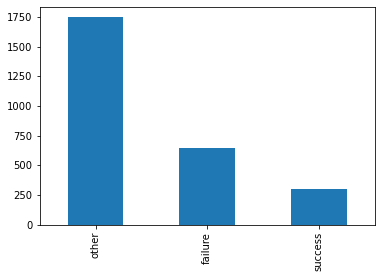

In [41]:
# Correct Misspellings pivot/merge complex categories e.t.c

# Map job variable to employed and unemployed 
df_test['job'] = df_test['job'].replace({'admin.':'employed','student':'unemployed'})
df_test['job'] = df_test['job'].replace({'management':'employed','Unemployed':'unemployed'})
df_test['job'] = df_test['job'].replace({'blue-collar':'employed','retired':'unemployed'})
df_test['job'] = df_test['job'].replace({'services':'employed','technician':'employed', 'self-employed':'employed','entrepreneur':'employed','housemaid':'employed'})

# T/N to remove 'unknown' groups later on
#df_test['job'].value_counts().plot(kind='bar'))           #after

# Correct the education variable
df_test['education'] = df_test['education'].replace({'unknown':'others'})
df_test['education'].value_counts().plot(kind='bar')

# Correct has_loan
df_test['has_loan'] = df_test['has_loan'].replace({'n':'no'})
df_test['has_loan'].value_counts().plot(kind='bar')

# Correct last contact
df_test['last_contact'] = df_test['last_contact'].replace({'unknown':'others', 'cell':'cellular'})
df_test['last_contact'].value_counts().plot(kind='bar')

# Correct Last contact month
df_test['last_contact_month'] = df_test['last_contact_month'].replace({'j':'jan'})
df_test['last_contact_month'].value_counts().plot(kind='bar')

# correct P-outcome
df_test['poutcome'] = df_test['poutcome'].replace({'unknown':'other', })
df_test['poutcome'].value_counts().plot(kind='bar')



[   0    1    0    1    0    1 -190   39]
[   0    0    0    1    0    1    0    1    0    1 -190   39]
[   0    1    0    0    0    0    1    0    1    0    1    0    1 -190
   39]
[   0    0    0    0    0    0    1    0    0    0    0    0    0    1
    0    0    0    0    1    0    1    0    1    0    1 -190   39]
[   0    1    0    0    0    0    0    0    0    1    0    0    0    0
    0    0    1    0    0    0    0    1    0    1    0    1    0    1
 -190   39]


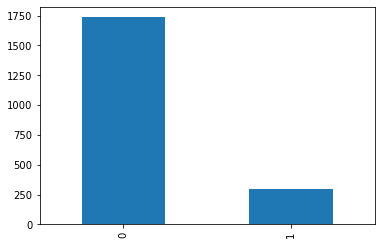

In [42]:

# Testtttt
# Remove Un-needed Rows:

# Remove countries not UK
df_test=df_test.loc[df_test['country'] == 'UK']

# remove unknown group in job column/feature/variable:
df_test=df_test.loc[df_test['job'] != 'unknown']

df_test['job'].value_counts().plot(kind='bar')

# Before We can normalise we need to trasform our categorical variable to numeric values via "ONE hot-encoding"

    # Features with Binary categories can be manually replaced like so first:::

df_test['job'] = df_test['job'].replace({'employed':1, 'unemployed':0})             # Job binary variable

df_test['housing'] = df_test['housing'].replace({'yes':1, 'no':0})                  # housing binary variable

df_test['has_loan'] = df_test['has_loan'].replace({'yes':1, 'no':0})                # has_loan binary variable


df_test['has_loan'].value_counts().plot(kind='bar')        #check distribution

mlab = ['married','education','last_contact','last_contact_month','poutcome']
x_multi = df_test[mlab].values
x_multi

#lets talk all items in array that reps married column:
x_multi[:,0].reshape(-1,1) #reshaping at -1,1 kinda flattens out the data into a 'single column' with 'multirow' structure

#so moving on....
from sklearn.preprocessing import OneHotEncoder
from numpy.lib import recfunctions
# Needed for the function to convert from structured to unstructured ndarray

# Encode Married
enc = OneHotEncoder()
fp1 = x_multi[:,0].reshape(-1,1)
enc.fit(fp1)
codedfp1 = enc.transform(fp1).toarray()

codedfp1

# Encode Education
enc = OneHotEncoder()
fp2 = x_multi[:,1].reshape(-1,1)
enc.fit(fp2)
codedfp2 = enc.transform(fp2).toarray()

codedfp2

# Encode last_contact
enc = OneHotEncoder()
fp3 = x_multi[:,2].reshape(-1,1)
enc.fit(fp3)
codedfp3 = enc.transform(fp3).toarray()

codedfp3

# Encode last_contact_month
enc = OneHotEncoder()
fp4 = x_multi[:,3].reshape(-1,1)
enc.fit(fp4)
codedfp4 = enc.transform(fp4).toarray()

codedfp4

# Encode poutcom
enc = OneHotEncoder()
fp5 = x_multi[:,4].reshape(-1,1)
enc.fit(fp5)
codedfp5 = enc.transform(fp5).toarray()

codedfp5

# Convert selected numerical and binary variable into array
selec_num_data = df_test[['job', 'housing', 'has_loan', 'current_balance', 'age']].values
selec_num_data


X_test = np.insert(selec_num_data, [0], codedfp1, axis=1)
print(X_test[0])

X_test = np.insert(X_test, [0], codedfp2, axis=1)
print(X_test[0])

X_test = np.insert(X_test, [0], codedfp3, axis=1)
print(X_test[0])

X_test = np.insert(X_test, [0], codedfp4, axis=1)
print(X_test[0])

X_test = np.insert(X_test, [0], codedfp5, axis=1)
print(X_test[0])

from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
X_test = mm_scaler.fit_transform(X_test)
X_test

Y_test = df_test['made_deposit'].values    


# Application COmpleted.....

In [43]:
# Now that  the steps taken on the Training Data have  been applied to the test set 
# Lets predict the Test data outcome using our model
Y_pred = rf.predict(X_test)

In [61]:
Y_pred
Y_test

array(['yes', 'yes', 'no', ..., 'yes', 'no', 'no'], dtype=object)

In [62]:
# How Close Are the predictions: 'Confusion Matrix'
from sklearn import metrics
from IPython.display import display
from sklearn.metrics import accuracy_score
Y_pred
Y_test
print("AccuracyScore:",accuracy_score(Y_test, Y_pred))

display('Confusion Matrix',metrics.confusion_matrix(Y_test, Y_pred))

#print("Precision Score:", metrics.precision_score(Y_test, Y_pred))

#print('F1 Score:', metrics.f1_score(Y_test, Y_pred, average='binary'))



AccuracyScore: 0.7586726998491704


'Confusion Matrix'

array([[860, 206],
       [274, 649]], dtype=int64)